In [ ]:
! pip install pyspark


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.9/316.9 MB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.0-py2.py3-none-any.whl size=317425345 sha256=f606693aa0aa33188073edb350e3660bac41a82c5aa917c9521260abda600574
  Stored in directory: /root/.cache/pip/wheels/41/4e/10/c2cf2467f71c678cfc8a6b9ac9241e5e44a01940da8fbb17fc
Successfully built pyspark


In [ ]:
import matplotlib.pyplot as plt
from pyspark.sql import SparkSession
from pyspark.sql.functions import col




In [ ]:
spark = SparkSession.builder.appName("InflasiAnalysis").getOrCreate()


In [ ]:
# Ganti 'path_to_your_inflation_data.csv' dengan lokasi file CSV data inflasi Anda
inflasi_df = spark.read.csv('/content/inflasi.csv', header=True, inferSchema=True)



In [ ]:
# Mengambil 5 baris pertama dari DataFrame
inflasi_df.show(5, truncate=False)

+---------------------+-------+--------+------+------+------+------+------+-------+---------+-------+--------+--------+
|Kota_Inflasi         |Januari|Februari|Maret |April |Mei   |Juni  |Juli  |Agustus|September|Oktober|November|Desember|
+---------------------+-------+--------+------+------+------+------+------+-------+---------+-------+--------+--------+
|KOTA MEULABOH        |134.29 |133.34  |133.86|134.1 |135.89|137.66|137.95|138.22 |139.48   |139.73 |139.03  |138.77  |
|KOTA BANDA ACEH      |128.75 |128.06  |127.5 |127.96|129.85|130.34|130.03|130.12 |129.41   |129.5  |129.37  |129.97  |
|KOTA LHOKSEUMAWE     |131.34 |130.45  |129.86|130.69|131.81|132.21|132.5 |131.78 |131.22   |131.91 |131.94  |132.73  |
|KOTA SIBOLGA         |140.46 |139.48  |139.82|141.43|142.38|145.59|148.33|147.47 |144.61   |144.08 |143.39  |144.12  |
|KOTA PEMATANG SIANTAR|139.1  |138.69  |139.06|140.49|141.43|142.71|143.12|142.55 |140.87   |140.89 |140.75  |141.23  |
+---------------------+-------+--------+

In [ ]:
# Ganti "InflationRate" dengan nama kolom rata-rata inflasi yang sesuai di dataset Anda
# Ganti "Kota Inflasi" dengan nama kolom kota inflasi yang sesuai di dataset Anda

# Menggunakan sintaks bracket untuk nama kolom yang mengandung spasi
inflasi_df.groupBy("Kota_Inflasi", "Januari", "Februari", "Maret", "April", "Mei", "Juni", "Juli", "Agustus", "September", "Oktober", "November", "Desember") \
    .agg({"Kota_Inflasi": "mean"}).show()


+--------------------+-------+--------+------+------+------+------+------+-------+---------+-------+--------+--------+-----------------+
|        Kota_Inflasi|Januari|Februari| Maret| April|   Mei|  Juni|  Juli|Agustus|September|Oktober|November|Desember|avg(Kota_Inflasi)|
+--------------------+-------+--------+------+------+------+------+------+-------+---------+-------+--------+--------+-----------------+
|          KOTA BATAM| 137.14|   137.5|137.48|137.73|139.15|139.48|140.33| 139.12|   138.35| 137.97|  137.96|  139.73|             NULL|
| KOTA PANGKAL PINANG| 142.99|   142.3|141.22|142.26|144.79|146.22|145.62| 145.48|   145.61| 145.58|  144.39|  144.94|             NULL|
|      KOTA SURAKARTA| 129.81|  129.67|130.05|130.93| 131.3|131.89|132.39| 132.18|   131.83| 132.16|  132.46|   133.1|             NULL|
|          PURWOKERTO| 132.08|  131.74|131.99|132.27|132.91|133.63|134.23| 134.79|   134.11|  134.0|   134.2|  134.88|             NULL|
|       KOTA SEMARANG| 132.99|   132.5|13

In [ ]:
from pyspark.sql.functions import avg

# Ganti "InflationRate" dengan nama kolom rata-rata inflasi yang sesuai di dataset Anda
# Ganti "Kota Inflasi" dengan nama kolom kota inflasi yang sesuai di dataset Anda
result = inflasi_df.groupBy("Kota_Inflasi").agg(
    avg("Januari").alias("Avg_Januari"),
    avg("Februari").alias("Avg_Februari"),
    avg("Maret").alias("Avg_Maret"),
    avg("April").alias("Avg_April"),
    avg("Mei").alias("Avg_Mei"),
    avg("Juni").alias("Avg_Juni"),
    avg("Juli").alias("Avg_Juli"),
    avg("Agustus").alias("Avg_Agustus"),
    avg("September").alias("Avg_September"),
    avg("Oktober").alias("Avg_Oktober"),
    avg("November").alias("Avg_November"),
    avg("Desember").alias("Avg_Desember")
)

result.show()



+--------------------+-----------+------------+---------+---------+-------+--------+--------+-----------+-------------+-----------+------------+------------+
|        Kota_Inflasi|Avg_Januari|Avg_Februari|Avg_Maret|Avg_April|Avg_Mei|Avg_Juni|Avg_Juli|Avg_Agustus|Avg_September|Avg_Oktober|Avg_November|Avg_Desember|
+--------------------+-----------+------------+---------+---------+-------+--------+--------+-----------+-------------+-----------+------------+------------+
|        KOTA SIBOLGA|     140.46|      139.48|   139.82|   141.43| 142.38|  145.59|  148.33|     147.47|       144.61|     144.08|      143.39|      144.12|
|         KOTA PADANG|     140.11|      139.49|   139.95|   140.56| 141.77|  143.28|  144.55|     144.41|       143.04|     142.55|      142.07|      142.17|
|               KUDUS|     141.26|      140.97|   141.29|   141.58| 141.89|  142.75|  143.38|     144.56|       144.33|     144.47|      144.82|      145.17|
|KOTA PEMATANG SIA...|      139.1|      138.69|   13

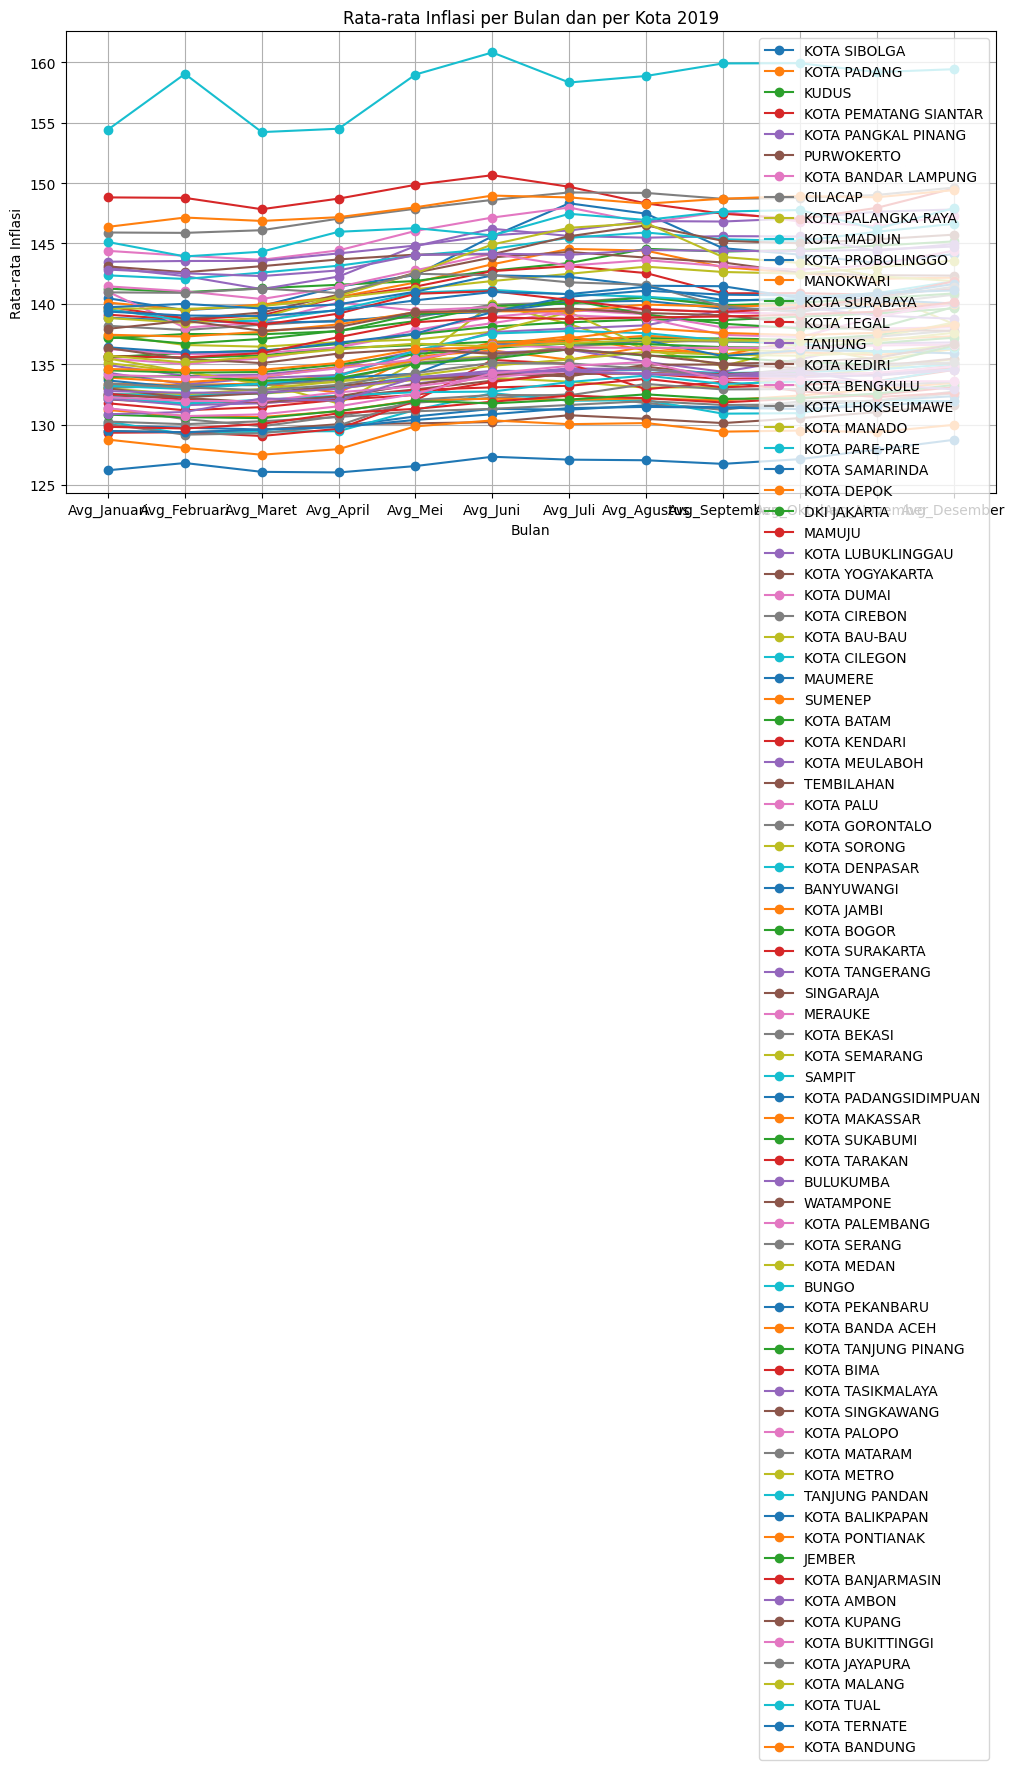

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Ganti "Kota Inflasi" dengan nama kolom kota inflasi yang sesuai di dataset Anda
# Ganti "Januari", "Februari", ..., "Desember" dengan nama kolom bulan yang sesuai di dataset Anda
result_pd = result.toPandas()

plt.figure(figsize=(12, 6))

for i in range(len(result_pd)):
    plt.plot(result_pd.columns[1:], result_pd.iloc[i, 1:], marker='o', label=result_pd.iloc[i, 0])

plt.title('Rata-rata Inflasi per Bulan dan per Kota 2019')
plt.xlabel('Bulan')
plt.ylabel('Rata-rata Inflasi')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np

In [ ]:
# Ganti "Januari", "Februari", ..., "Desember" dengan nama kolom bulan yang sesuai di dataset Anda
# Ganti "InflationRate" dengan nama kolom rata-rata inflasi yang sesuai di dataset Anda
bulan = np.array(range(1, 13)).reshape(-1, 1)
inflasi = np.array(result.select("Avg_Januari").rdd.flatMap(lambda x: x).collect()[:12])  # Mengambil 12 data pertama

# Membuat model regresi linier
model = LinearRegression()
model.fit(bulan, inflasi)

LinearRegression()

In [ ]:
# Membuat prediksi menggunakan model
predicted_values = model.predict(bulan)

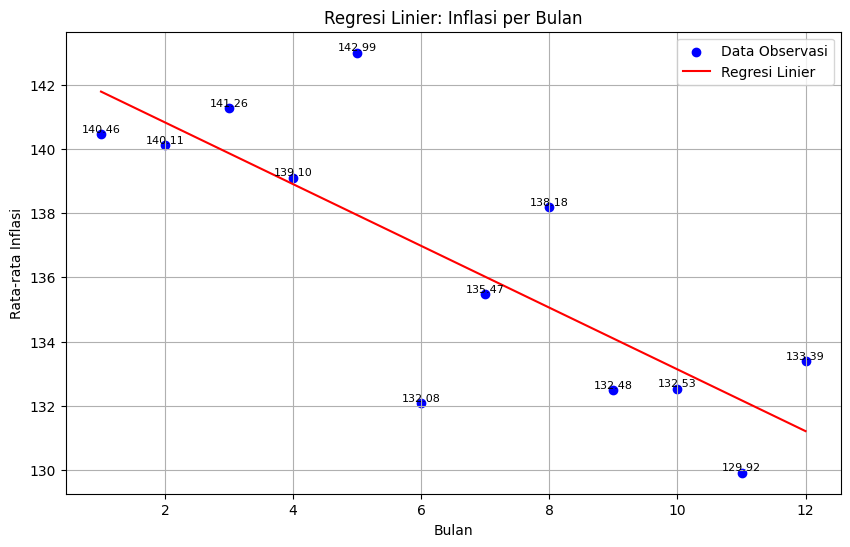

In [ ]:
# Visualisasi hasil regresi linier
plt.figure(figsize=(10, 6))
plt.scatter(bulan, inflasi, label='Data Observasi', color='blue')
plt.plot(bulan, predicted_values, label='Regresi Linier', color='red')
plt.title('Regresi Linier: Inflasi per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Rata-rata Inflasi')
plt.legend()
plt.grid(True)

# Menambahkan keterangan pada grafik
for i, txt in enumerate(inflasi):
    plt.text(bulan[i], txt, f'{txt:.2f}', ha='center', va='bottom', fontsize=8, color='black')


plt.show()

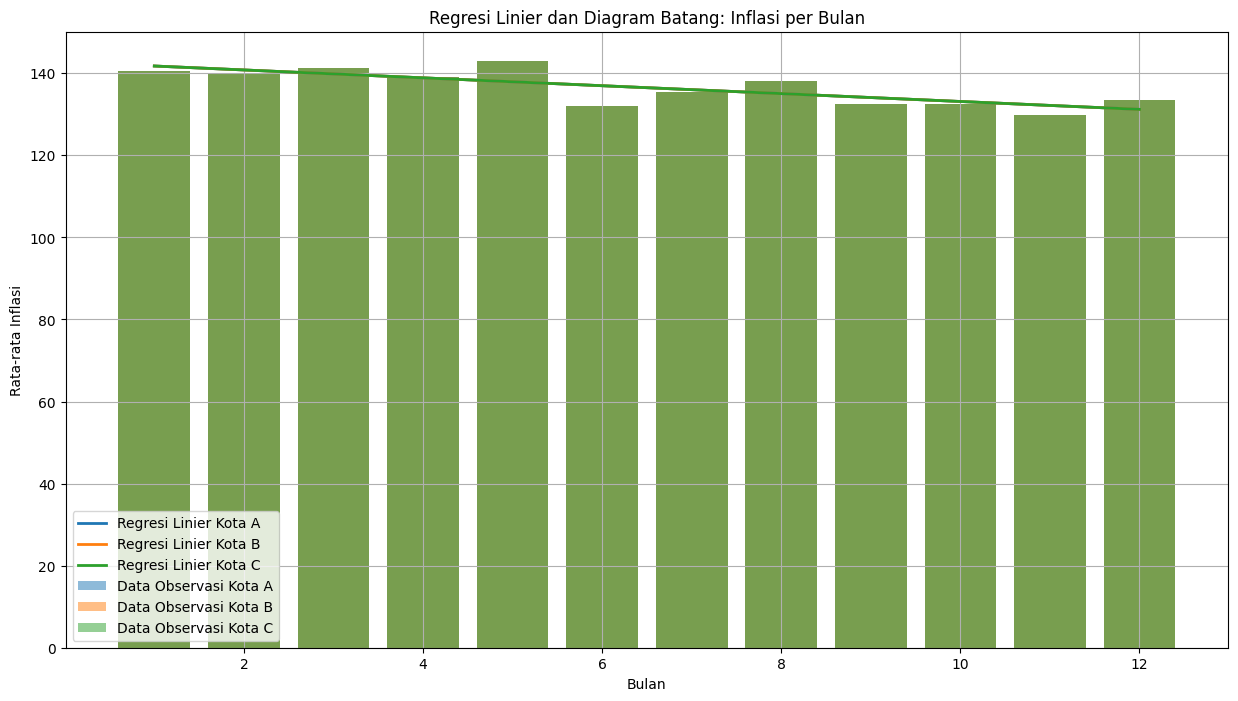

In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Ganti "Januari", "Februari", ..., "Desember" dengan nama kolom bulan yang sesuai di dataset Anda
bulan = np.array(range(1, 13)).reshape(-1, 1)

# Ganti dengan nama-nama kota yang sesuai di dataset Anda
kota_list = ["Kota A", "Kota B", "Kota C"]

plt.figure(figsize=(15, 8))

for kota in kota_list:
    # Ganti "Avg_Januari", ..., "Avg_Desember" dengan nama kolom yang sesuai di dataset Anda
    inflasi_kota = np.array(result.select(f"Avg_Januari").rdd.flatMap(lambda x: x).collect()[:12])  # Mengambil 12 data pertama

    # Membuat model regresi linier
    model = LinearRegression()
    model.fit(bulan, inflasi_kota)

    # Membuat prediksi menggunakan model
    predicted_values = model.predict(bulan)

    # Membuat diagram batang (bar chart) untuk setiap kota
    plt.bar(bulan.flatten(), inflasi_kota, label=f'Data Observasi {kota}', alpha=0.5)
    plt.plot(bulan, predicted_values, label=f'Regresi Linier {kota}', linewidth=2)

# Visualisasi hasil regresi linier dan diagram batang untuk setiap kota
plt.title('Regresi Linier dan Diagram Batang: Inflasi per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Rata-rata Inflasi')
plt.legend()
plt.grid(True)
plt.show()
